In [8]:
import pandas as pd
import matplotlib.pyplot as plt
# columns: Measurement date,Dose strength,Rain

lodz_df = pd.read_csv("data/lodz.csv")
gdynia_df = pd.read_csv("data/gdynia.csv")
krakow_df = pd.read_csv("data/krakow.csv")
warszawa_df = pd.read_csv("data/warszawa.csv")
lublin_df = pd.read_csv("data/lublin.csv")

In [9]:
lodz_df['Measurement date'] = pd.to_datetime(lodz_df['Measurement date'])

In [11]:
# specific_day = '2014-02-02'
# lodz_rain = lodz_df[lodz_df['Measurement date'].dt.date == pd.to_datetime(specific_day).date()].copy()
lodz_rain = lodz_df.copy()

# Create a new column 'Rain_Above_3' with initial False values
lodz_rain['Rain_Above_3'] = lodz_rain['Rain'] > 3

# Extend the True values to neighboring rows
lodz_rain['Rain_Above_3'] = lodz_rain['Rain_Above_3'] | lodz_rain['Rain_Above_3'].shift(1, fill_value=False) | lodz_rain['Rain_Above_3'].shift(-1, fill_value=False)

# Plotting
# plt.figure(figsize=(10, 6))

# # Plot all Rain values
# plt.plot(lodz_rain['Measurement date'], lodz_rain['Rain'], marker='o', linestyle='-', label='All Rain')

# # Highlight Rain values greater than 3 and their neighbors
# highlighted_df = lodz_rain[lodz_rain['Rain_Above_3']]
# plt.plot(highlighted_df['Measurement date'], highlighted_df['Rain'], marker='o', linestyle='-', color='red', label='Rain > 3 or Neighbor')

# # Add horizontal line at Rain = 3
# plt.axhline(y=3, color='gray', linestyle='--', label='Rain = 3')

# plt.xlabel('Time')
# plt.ylabel('Rain')
# # plt.title(f'Rain Levels (Lodz - {specific_day})')
# plt.grid(True)
# plt.legend()
# plt.show()

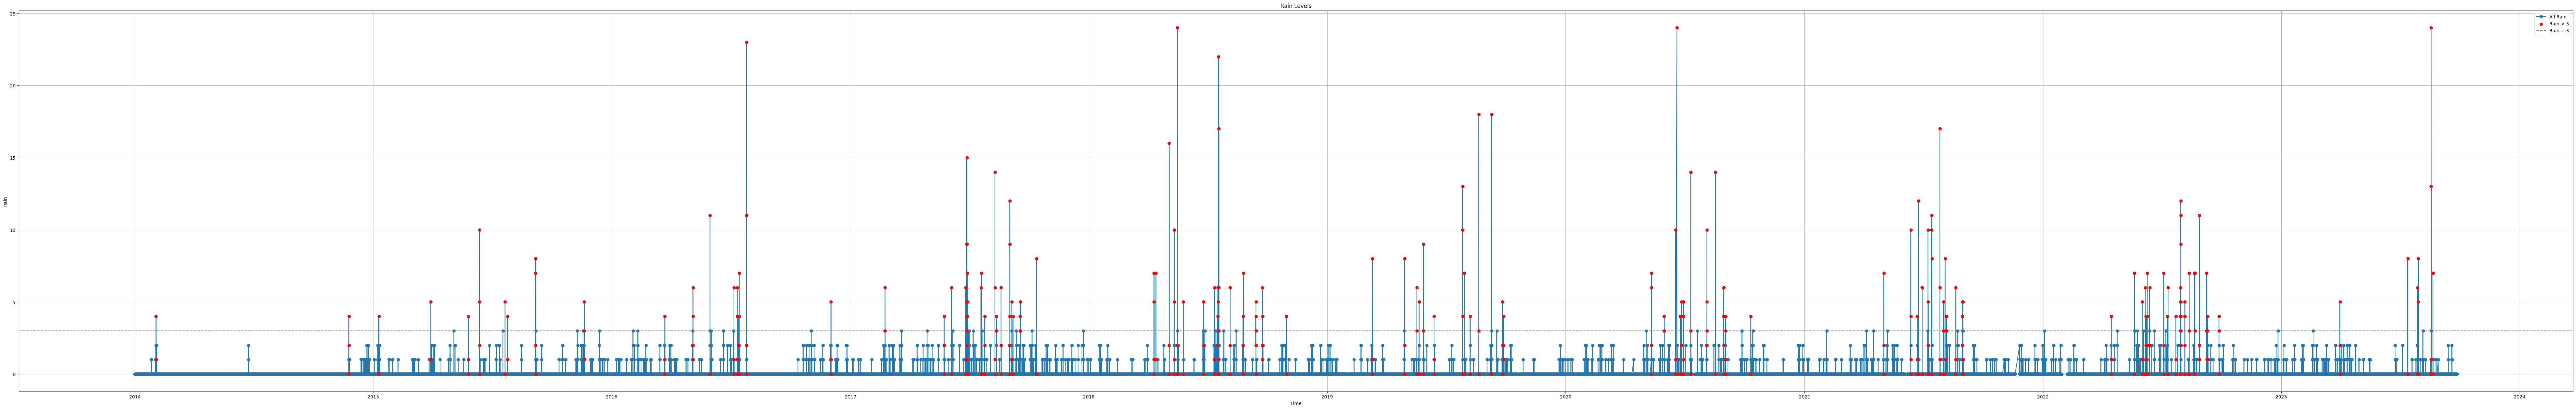

In [13]:
# Tworzenie wykresu
plt.figure(figsize=(100, 15))

# Wykres wszystkich wartości Rain
plt.plot(lodz_rain['Measurement date'], lodz_rain['Rain'], marker='o', linestyle='-', label='All Rain')

# Zaznaczenie wartości True jako czerwone punkty na wykresie
true_values = lodz_rain[lodz_rain['Rain_Above_3']]
plt.scatter(true_values['Measurement date'], true_values['Rain'], color='red', label='Rain > 3', zorder=5)

# Dodanie poziomej linii dla Rain = 3 (przerywana)
plt.axhline(y=3, color='gray', linestyle='--', label='Rain = 3')

plt.xlabel('Time')
plt.ylabel('Rain')
plt.title('Rain Levels')
plt.grid(True)
plt.legend()
plt.show()

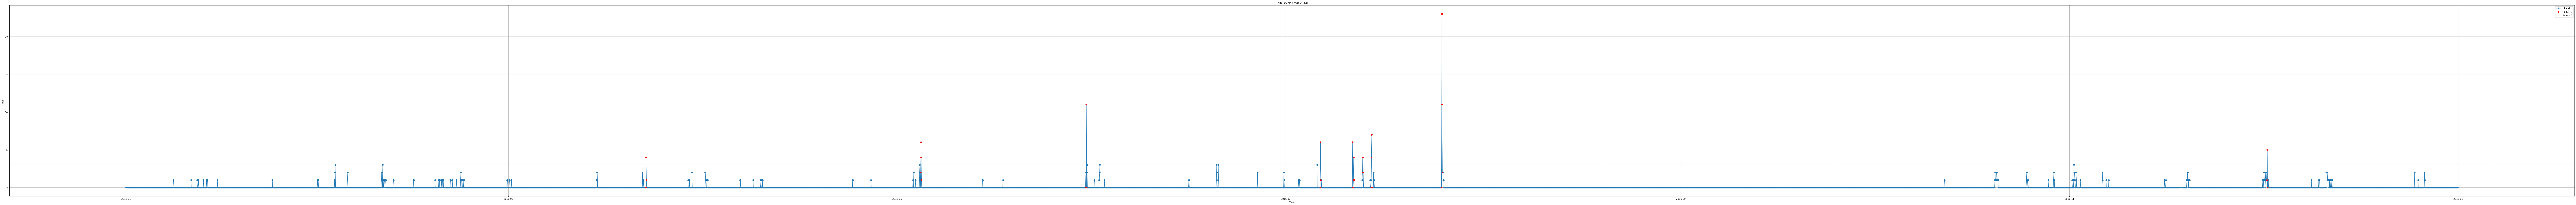

In [32]:
# Filtracja danych dla roku 2014
lodz_rain_2014 = lodz_rain[lodz_rain['Measurement date'].dt.year == 2016]

# Tworzenie wykresu
plt.figure(figsize=(200, 15))

# Wykres wszystkich wartości Rain dla roku 2014
plt.plot(lodz_rain_2014['Measurement date'], lodz_rain_2014['Rain'], marker='o', linestyle='-', label='All Rain')

# Zaznaczenie wartości True jako czerwone punkty na wykresie
true_values = lodz_rain_2014[lodz_rain_2014['Rain_Above_3']]
plt.scatter(true_values['Measurement date'], true_values['Rain'], color='red', label='Rain > 3', zorder=5)

# Dodanie poziomej linii dla Rain = 3 (przerywana)
plt.axhline(y=3, color='gray', linestyle='--', label='Rain = 3')

plt.xlabel('Time')
plt.ylabel('Rain')
plt.title('Rain Levels (Year 2014)')
plt.grid(True)
plt.legend()
plt.show()

In [44]:
slide_df = pd.read_csv("data/slide.csv")

In [45]:
slide_df['Measurement date'] = pd.to_datetime(slide_df['Measurement date'])

# Ustawienie 'Measurement date' jako indeks
slide_df.set_index('Measurement date', inplace=True)

# Obliczenie średniej dla Dose strength w okresie 12 godzin
mean_12h = slide_df['Dose strength'].resample('12h').mean()

# Dodanie nowej kolumny 'mean_12' do oryginalnego DataFrame slide_df
slide_df['mean_12'] = slide_df.index.map(lambda x: mean_12h.loc[x.floor('12h')])

# Dodanie kolumny 'Above_15_percent_mean_12h'
slide_df['Above_15_percent_mean_12h'] = False

# Sprawdzenie warunku i ustawienie wartości True
for index, row in slide_df.iterrows():
    value = slide_df.loc[index.floor('12h'), 'mean_12']
    if row['Dose strength'] > 0.15 * value + value:
        slide_df.at[index, 'Above_15_percent_mean_12h'] = True